<a href="https://colab.research.google.com/github/Robert-099/Trabalho_ia_webscraping/blob/main/trabalhoia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiro passo raspagem de tela
---



In [1]:
import requests
from bs4 import BeautifulSoup
import time
import random
import csv


HEADERS = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/117.0 Safari/537.36"
    )
}

# URLs das páginas
CATEGORIAS_URLS = {
    "bitcoin": "https://g1.globo.com/economia/bitcoin/",
    "mercado_financeiro": "https://g1.globo.com/economia/",
     "tecnologia": "https://g1.globo.com/tecnologia/"
}

def coletar_links(url, limite=100):

    print(f"Acessando página: {url}")
    resposta = requests.get(url, headers=HEADERS)
    if resposta.status_code != 200:
        print(f"Erro ao acessar a página (status {resposta.status_code})")
        return []

    soup = BeautifulSoup(resposta.text, "lxml")
    links = []

    for a_tag in soup.find_all("a", class_="feed-post-link"):
        link = a_tag.get("href")
        if link and link.startswith("https://g1.globo.com/") and link not in links:
            links.append(link)
        if len(links) >= limite:
            break

    print(f"{len(links)} links encontrados.")
    return links

def extrair_texto_noticia(url):

    print(f"Abrindo notícia: {url}")
    resposta = requests.get(url, headers=HEADERS)
    if resposta.status_code != 200:
        print(f"Erro ao abrir a notícia (status {resposta.status_code})")
        return None, None

    soup = BeautifulSoup(resposta.text, "html.parser")

    titulo_tag = soup.find("h1")
    titulo = titulo_tag.get_text(strip=True) if titulo_tag else "Sem título"

    paragrafos = soup.select("div[class*='content-text__container'] p")
    if not paragrafos:
        paragrafos = soup.select("article p")

    texto = "\n".join(p.get_text(strip=True) for p in paragrafos)
    if len(texto) < 100:
        return None, None

    return titulo, texto

def salvar_noticias_multicategoria(categorias_urls, limite_por_categoria=100, arquivo="dataset_multicategoria.csv"):

    with open(arquivo, "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["titulo", "texto", "categoria"])

        for categoria, url in categorias_urls.items():
            print(f"\n==== Coletando notícias da categoria: {categoria} ====")
            links = coletar_links(url, limite_por_categoria)
            if not links:
                print(f"Nenhum link encontrado para {categoria}.")
                continue

            for i, link in enumerate(links, start=1):
                titulo, texto = extrair_texto_noticia(link)
                if titulo and texto:
                    writer.writerow([titulo, texto, categoria])
                    print(f"[{i}/{len(links)}] Notícia salva: {titulo[:60]}...")
                else:
                    print(f"[{i}/{len(links)}] Falha ao extrair notícia.")

                time.sleep(random.uniform(1, 2))  # pausa ite

    print(f"\nConcluído! Arquivo '{arquivo}' criado com notícias de múltiplas categorias.")

if __name__ == "__main__":
    salvar_noticias_multicategoria(CATEGORIAS_URLS, limite_por_categoria=100)



==== Coletando notícias da categoria: bitcoin ====
Acessando página: https://g1.globo.com/economia/bitcoin/
10 links encontrados.
Abrindo notícia: https://g1.globo.com/mundo/noticia/2025/05/27/sequestros-no-setor-de-criptomoedas-franca-detem-mais-de-20-suspeitos-de-integrar-gangues.ghtml
[1/10] Notícia salva: Sequestros no setor de criptomoedas: França detém mais de 20...
Abrindo notícia: https://g1.globo.com/economia/noticia/2025/05/21/bitcoin-recorde.ghtml
[2/10] Notícia salva: Bitcoin supera US$ 109,4 mil e bate novo recorde...
Abrindo notícia: https://g1.globo.com/mundo/noticia/2025/05/13/gangue-tenta-sequestrar-filha-e-neto-de-ceo-de-empresa-de-criptomoedas-na-franca-video.ghtml
[3/10] Notícia salva: Gangue tenta sequestrar filha e neto de CEO de empresa de cr...
Abrindo notícia: https://g1.globo.com/economia/noticia/2022/12/05/vencedor-do-nobel-paul-krugman-decreta-o-fim-do-bitcoin.ghtml
[4/10] Notícia salva: Vencedor do Nobel, Paul Krugman decreta o 'fim do Bitcoin'...
Abrindo 

segudo passo divisao de conjuntos


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



=== Tamanhos dos Conjuntos ===
Treino: 17 (68.0%)
Validação: 5 (20.0%)
Teste: 3 (12.0%)


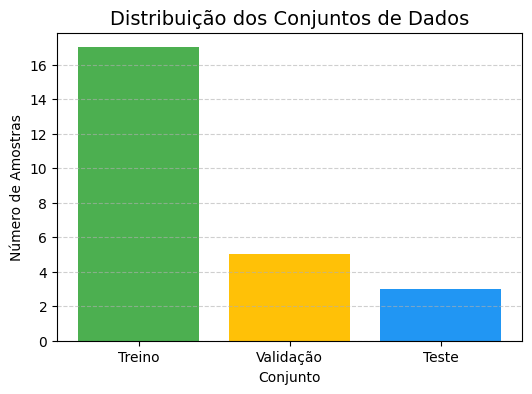


Conjunto de Validação
                    precision    recall  f1-score   support

           bitcoin       0.40      1.00      0.57         2
mercado_financeiro       0.00      0.00      0.00         1
        tecnologia       0.00      0.00      0.00         2

          accuracy                           0.40         5
         macro avg       0.13      0.33      0.19         5
      weighted avg       0.16      0.40      0.23         5


Conjunto de Teste
                    precision    recall  f1-score   support

           bitcoin       0.33      1.00      0.50         1
mercado_financeiro       0.00      0.00      0.00         1
        tecnologia       0.00      0.00      0.00         1

          accuracy                           0.33         3
         macro avg       0.11      0.33      0.17         3
      weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords

#Preparação
nltk.download('stopwords')
stop_words = stopwords.words('portuguese')

# Carregar o dataset
dataset = pd.read_csv("dataset_multicategoria.csv").dropna(subset=['texto', 'categoria'])

X = dataset['texto']
y = dataset['categoria']

# 1ª divisão: 90% treino+validação / 10% teste
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42,
    stratify=y
)

# 2ª divisão: 70% treino / 20% validação
# Proporção de validação = 20% do total = (20 / 90) ≈ 0.222
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.222,
    random_state=42,
    stratify=y_temp
)

tamanhos = {
    "Treino": len(X_train),
    "Validação": len(X_val),
    "Teste": len(X_test)
}

print("\n=== Tamanhos dos Conjuntos ===")
for nome, tamanho in tamanhos.items():
    print(f"{nome}: {tamanho} ({tamanho/len(X)*100:.1f}%)")

# Visualização:
plt.figure(figsize=(6, 4))
plt.bar(tamanhos.keys(), tamanhos.values(), color=['#4CAF50', '#FFC107', '#2196F3'])
plt.title("Distribuição dos Conjuntos de Dados", fontsize=14)
plt.ylabel("Número de Amostras")
plt.xlabel("Conjunto")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

# Treinamento do modelo
modelo = MultinomialNB()
modelo.fit(X_train_vec, y_train)

# conjunto de validação
print("\nConjunto de Validação")
y_val_pred = modelo.predict(X_val_vec)
print(classification_report(y_val, y_val_pred))

# conjunto de teste
print("\nConjunto de Teste")
y_test_pred = modelo.predict(X_test_vec)
print(classification_report(y_test, y_test_pred))


Terceiro passo Embeddings

In [4]:

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

dataset = pd.read_csv("dataset_multicategoria.csv").dropna(subset=['texto', 'categoria'])

X = dataset['texto'].tolist()
y = dataset['categoria'].tolist()

#Divisão
#90% treino+validação / 10% teste
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

#70% treino / 20% validação
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.222, random_state=42, stratify=y_temp
)

#SBERT
print("Carregando modelo SBERT...")
modelo_sbert = SentenceTransformer('all-MiniLM-L6-v2')

#Gerar embeddings
print("Gerando embeddings para treino...")
X_train_emb = modelo_sbert.encode(X_train, show_progress_bar=True, convert_to_numpy=True)

print("Gerando embeddings para validação...")
X_val_emb = modelo_sbert.encode(X_val, show_progress_bar=True, convert_to_numpy=True)

print("Gerando embeddings para teste...")
X_test_emb = modelo_sbert.encode(X_test, show_progress_bar=True, convert_to_numpy=True)

#reinar classificador
print("Treinando Regressao...")
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_emb, y_train)

#validação
print("\nesempenho no Conjunto de Validação:")
y_val_pred = clf.predict(X_val_emb)
print(classification_report(y_val, y_val_pred))

#conjunto de teste
print("\nDesempenho Final (Conjunto de Teste):")
y_test_pred = clf.predict(X_test_emb)
print(classification_report(y_test, y_test_pred))

#salvar embeddings
np.save('X_train_emb.npy', X_train_emb)
np.save('X_val_emb.npy', X_val_emb)
np.save('X_test_emb.npy', X_test_emb)
np.save('y_train.npy', np.array(y_train))
np.save('y_val.npy', np.array(y_val))
np.save('y_test.npy', np.array(y_test))

print("\nEmbeddings salvos em arquivos .npy")


Carregando modelo SBERT...
Gerando embeddings para treino...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Gerando embeddings para validação...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Gerando embeddings para teste...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Treinando Regressao...

esempenho no Conjunto de Validação:
                    precision    recall  f1-score   support

           bitcoin       0.50      1.00      0.67         2
mercado_financeiro       0.00      0.00      0.00         1
        tecnologia       1.00      0.50      0.67         2

          accuracy                           0.60         5
         macro avg       0.50      0.50      0.44         5
      weighted avg       0.60      0.60      0.53         5


Desempenho Final (Conjunto de Teste):
                    precision    recall  f1-score   support

           bitcoin       0.50      1.00      0.67         1
mercado_financeiro       1.00      1.00      1.00         1
        tecnologia       0.00      0.00      0.00         1

          accuracy                           0.67         3
         macro avg       0.50      0.67      0.56         3
      weighted avg       0.50      0.67      0.56         3


Embeddings salvos em arquivos .npy


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Quarto passo Classificador

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np


X_train_emb = np.load('X_train_emb.npy')
X_val_emb = np.load('X_val_emb.npy')
X_test_emb = np.load('X_test_emb.npy')
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')
y_test = np.load('y_test.npy')

# KNN
print("Treinando KNN")
param_grid_knn = {'n_neighbors': [1, 3, 5, 7]}
knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3)
knn.fit(X_train_emb, y_train)

y_test_pred_knn = knn.predict(X_test_emb)
print("Melhor k:", knn.best_params_)
print("Acurácia no teste:", accuracy_score(y_test, y_test_pred_knn))
print(classification_report(y_test, y_test_pred_knn))

# Logistic Regression
print("\nTreinando Logistic Regression")
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=3)
lr.fit(X_train_emb, y_train)

y_test_pred_lr = lr.predict(X_test_emb)
print("Melhor C:", lr.best_params_)
print("Acurácia no teste:", accuracy_score(y_test, y_test_pred_lr))
print(classification_report(y_test, y_test_pred_lr))

# Support Vector Machine (SVM)
print("\nTreinando SVM")
param_grid_svm = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = GridSearchCV(SVC(), param_grid_svm, cv=3)
svm.fit(X_train_emb, y_train)

y_test_pred_svm = svm.predict(X_test_emb)
print("Melhor SVM:", svm.best_params_)
print("Acurácia no teste:", accuracy_score(y_test, y_test_pred_svm))
print(classification_report(y_test, y_test_pred_svm))


Treinando KNN
Melhor k: {'n_neighbors': 1}
Acurácia no teste: 1.0
                    precision    recall  f1-score   support

           bitcoin       1.00      1.00      1.00         1
mercado_financeiro       1.00      1.00      1.00         1
        tecnologia       1.00      1.00      1.00         1

          accuracy                           1.00         3
         macro avg       1.00      1.00      1.00         3
      weighted avg       1.00      1.00      1.00         3


Treinando Logistic Regression
Melhor C: {'C': 100}
Acurácia no teste: 0.6666666666666666
                    precision    recall  f1-score   support

           bitcoin       0.50      1.00      0.67         1
mercado_financeiro       1.00      1.00      1.00         1
        tecnologia       0.00      0.00      0.00         1

          accuracy                           0.67         3
         macro avg       0.50      0.67      0.56         3
      weighted avg       0.50      0.67      0.56         3

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
